## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading the data set from the previous exercise

In [2]:
# Read the CSV file
df = pd.read_csv('Full merged.csv')

# Display the DataFrame
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Date,AVGTemperature (°C),_merge
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-16.6,both
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,-5.8,both
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,-10.6,both
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-16.6,both
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,1.9,both


In [3]:
# Read the CSV file for temperature
df_weather = pd.read_csv('temperature_data_2022.csv')

# Display the DataFrame
df_weather.head()


,Date,AVGTemperature (°C)
0,2022-01-01,2.0
1,2022-01-02,-4.6
2,2022-01-03,-9.2
3,2022-01-04,-3.6
4,2022-01-05,-4.6


In [7]:
# Group by the count of the trips

# Group by 'date' and count the number of trips ('trip_id')
df_group = pd.DataFrame(df.groupby(['Date'])['ride_id'].count()).reset_index()

# Display the result
df_group.head()


,Date,ride_id
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


## Creating a column with the count of trips

In [8]:
# Rename the columns to ensure they match
df.rename(columns={'Date': 'date'}, inplace=True)  # Ensure both have 'Date' column name

In [10]:
# Display the result
df_group.head()

,Date,ride_id
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [11]:
# Rename the columns to ensure they match
df_group.rename(columns={'Date': 'date'}, inplace=True)  # Ensure both have 'Date' column name

# Rename the 'trip_id' column to 'bike_rides_daily' in the grouped DataFrame
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)


In [12]:
# Display the result
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,AVGTemperature (°C),_merge
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-16.6,both
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,-5.8,both
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,-10.6,both
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-16.6,both
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,1.9,both


In [13]:
# Merge the original dataframe 'df' with the grouped dataframe 'df_group' on the 'Date' column
df = df.merge(df_group, on='date', how='outer', indicator='merge_2')

# Display the value counts of the merge indicator column
print(df['merge_2'].value_counts(dropna=False))

# Check the shape of data for specific dates
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape)
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape)


merge_2
both          895485
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (0, 18)
Shape of January 2nd is (0, 18)


In [14]:
# Display the result
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,AVGTemperature (°C),_merge,bike_rides_daily,merge_2
0,115C78C3039FFA89,electric_bike,2022-01-01 09:21:14,2022-01-01 09:35:46,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-01,2.0,both,592,both
1,7FFD810CAA7A919E,classic_bike,2022-01-01 02:43:56,2022-01-01 02:43:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-01,2.0,both,592,both
2,E715E8432031B72C,classic_bike,2022-01-01 02:13:33,2022-01-01 02:18:42,Essex Light Rail,JC038,Washington St,JC098,40.712774,-74.036486,40.724294,-74.035483,member,2022-01-01,2.0,both,592,both
3,BF1B7B1E1961A87B,electric_bike,2022-01-01 17:18:46,2022-01-01 18:55:25,Grand St,JC102,W 27 St & 7 Ave,6247.06,40.715178,-74.037683,40.746647,-73.993915,casual,2022-01-01,2.0,both,592,both
4,4A01F0E53C6F4386,electric_bike,2022-01-01 11:23:32,2022-01-01 11:29:27,Christ Hospital,JC034,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.734786,-74.050444,40.735938,-74.030305,member,2022-01-01,2.0,both,592,both


## Creating aline plot of temperatures

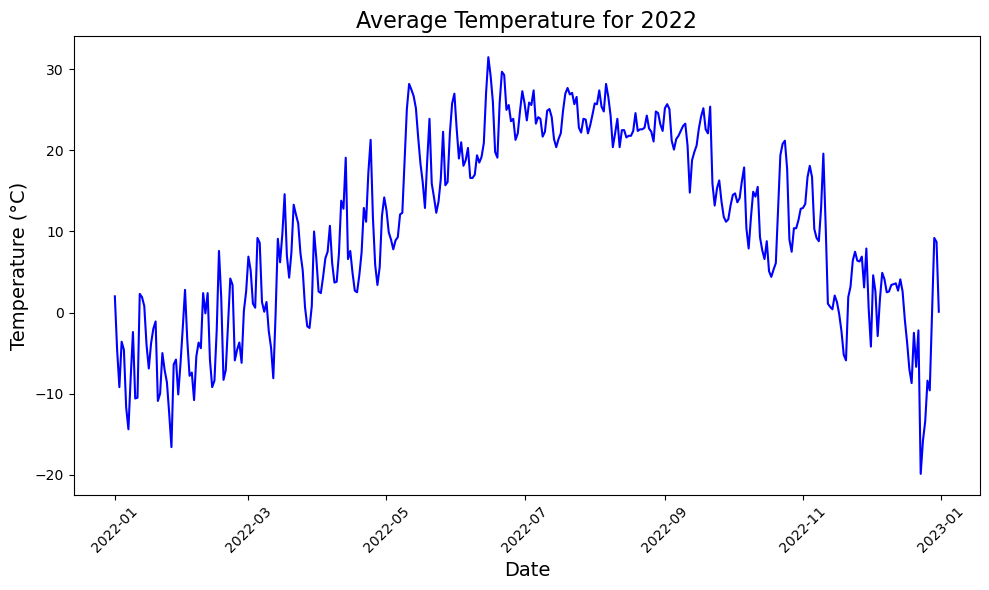

In [15]:
# Assuming 'date' column exists and is in datetime format

# Ensure 'date' column is in datetime format if not already
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Set 'date' as the index
df_weather = df.set_index('date')

# Create the line plot with the date as the x-axis
plt.figure(figsize=(10, 6))
plt.plot(df_weather['AVGTemperature (°C)'], color='blue')

# Add labels and title
plt.title('Average Temperature for 2022', fontsize=16)
plt.xlabel('Date', fontsize=14)  # Add this line to label the x-axis
plt.ylabel('Temperature (°C)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


## Observation

I can observe a distinct seasonal trend in the plot above. Temperatures rise during the spring and summer months (around March to August) and fall during winter months (around November to January). This means there is an increase in temperature around mid-year, followed by a drop as the year progresses towards winter.

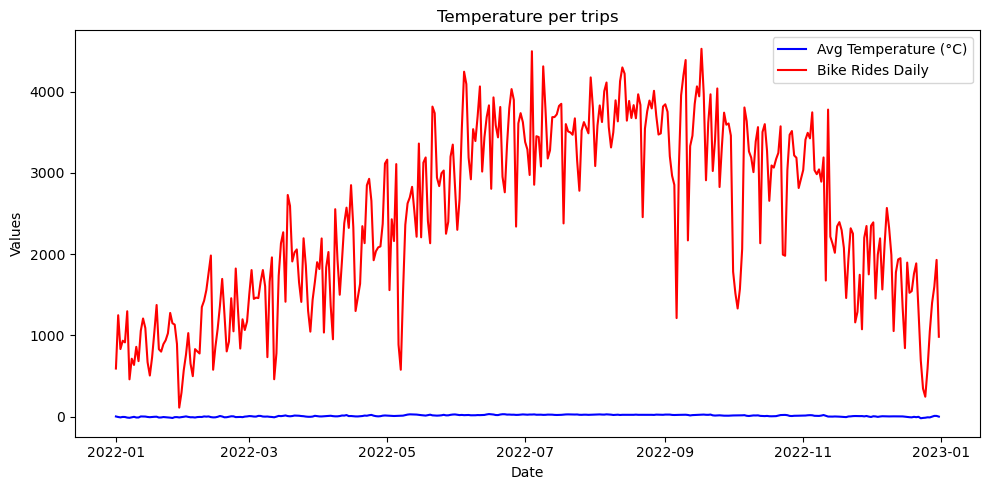

In [16]:
# Make sure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Create the plot
plt.figure(figsize=(10, 5))
plt.title('Temperature per trips')

# Plot temperature and bike rides with 'date' on the x-axis
plt.plot(df['date'], df['AVGTemperature (°C)'], label='Avg Temperature (°C)', color='blue')
plt.plot(df['date'], df['bike_rides_daily'], label='Bike Rides Daily', color='red')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Observation

The temperature per trip graph follows a clear seasonal pattern, with colder temperatures in the winter months and warmer temperatures in the summer months. This is typical for this location and shows that the temperature is lower during the first and last quarters of the year (typically winter) and rises during the middle months (spring and summer).
I see that as temperature increases, the number of bike rides also increases. This suggests that people tend to ride bikes more when the weather is warmer and more pleasant.

## Creating a line chart of bike trip counts and temperature plotted on a dual-axis

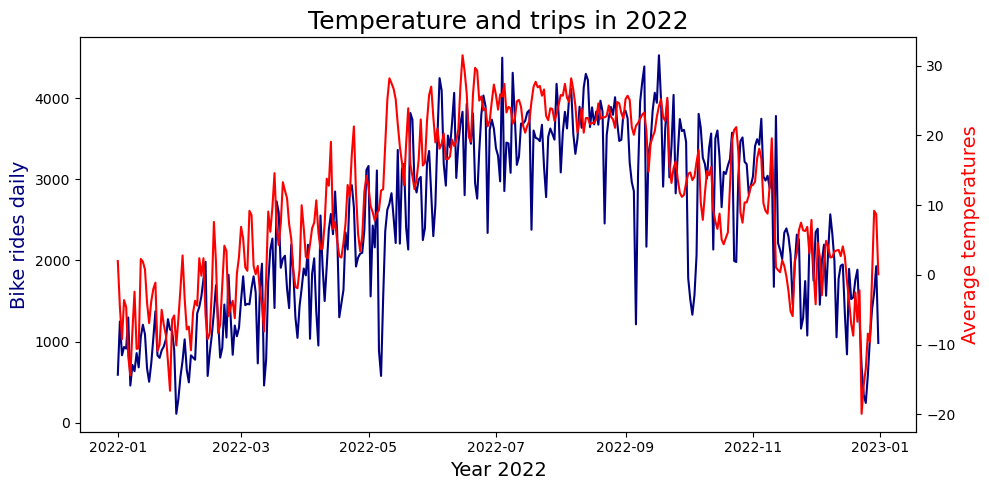

In [17]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Create figure and axis objects with subplots() and details
fig, ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['date'], df['bike_rides_daily'], color="navy")
ax.set_xlabel("Year 2022", fontsize=14)  # set x-axis label
ax.set_ylabel("Bike rides daily", color="navy", fontsize=14)  # set y-axis label

# Create the twin axis for temperatures
ax2 = ax.twinx()

# Plot temperatures on the second y-axis
ax2.plot(df['date'], df['AVGTemperature (°C)'], color="red")
ax2.set_ylabel("Average temperatures", color="red", fontsize=14)

# Add title
plt.title('Temperature and trips in 2022', fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()


## Observation

I can see a relationship between temperature and Bike rides. As expected, there seems to be an inverse relationship between temperature and bike rides. On colder days, the number of bike rides is generally lower, while on warmer days, the number of bike rides tends to increase. This could be a common trend where people are more likely to ride bikes in warmer weather, and less likely to do so during colder months.

## Briefly Explain the code

# Create figure and axis objects with subplots()
This line creates a figure and an axis object using the subplots() function.
The figsize=(10, 5) parameter specifies the size of the figure in inches.

# Plotting bike rides data:
This line plots the daily bike rides (df['bike_rides_daily']) against the x-axis (which represents dates, implicitly as it's indexed in df).
The color of the plot line is set to navy.

# Set labels for x and y axes
The x-axis is labeled as "Year 2022" and the y-axis is labeled as "Bike rides daily".
The font size for the labels is set to 14.
The y-axis label color is set to navy to match the color of the bike ride line.

# Create a secondary y-axis (ax2) for temperature data:
his line creates a twin axis (ax2) that shares the same x-axis but has a separate y-axis. This allows us to plot the temperature data on a different scale.

# Plotting temperature data:
This line plots the average temperature (df['AVGTemperature (°C)']) on the second y-axis (ax2), and the color is set to red for clear distinction from the bike rides plot.

# Set label for the second y-axis:
The second y-axis (temperature axis) is labeled as "Average temperatures" in red color to match the temperature plot line.

# Set title for the plot:
The plot title is set to "Temperature and trips in 2022", with a font size of 18.

# Display the plot:
Finally, this line displays the plot, showing both bike ride data and temperature data on a single graph

In [18]:
## Saving the df as a csv
df.to_csv('Full grouped3.csv', index=False)